**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [1]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
# %matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，
# 或者生成一个figure画布的时候，可以直接在你的python console里面生成图像
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [2]:
#加载result.csv这个数据
Result=pd.read_csv('result.csv')
Result.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

In [4]:
#思考回答
#这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号b
# 1、对比各个值之间的差别：柱图、雷达、漏斗、极坐标、旋风漏斗、词云
# 2、部分占总体的百分比：饼图、漏斗、仪表盘、矩阵树图
# 3、显示各个值之间的关系：散点、矩阵树图、指标看板、树图、来源去向
# 4、数值随纬度的变化情况：线图、柱图
# 5、数值和地理信息映射图：气泡地图、色彩地图
# 【详见https://blog.csdn.net/weixin_43135165/article/details/103964813】

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

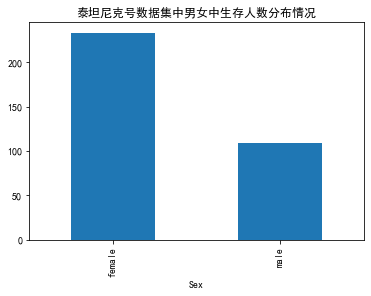

In [11]:
#代码编写
# 分组计算男女中生存人数
sex_count=Result.Survived.groupby(Result.Sex).sum()
#绘制柱形图
sex_count.plot.bar()
plt.title('泰坦尼克号数据集中男女中生存人数分布情况')
plt.show()

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

In [45]:
#思考题回答
# 从图像中可以看出女性生存率更高

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

Text(0.5, 0, '性别')

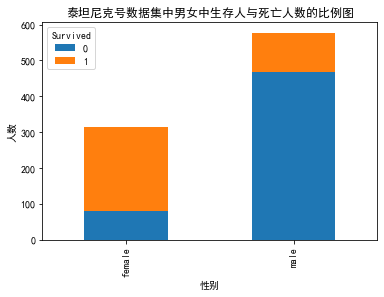

In [19]:
#代码编写
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
Result.groupby(['Sex','Survived']).Survived.count().unstack().plot(kind='bar',stacked='True')
plt.title('泰坦尼克号数据集中男女中生存人与死亡人数的比例图')
plt.ylabel('人数')
plt.xlabel('性别')

【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

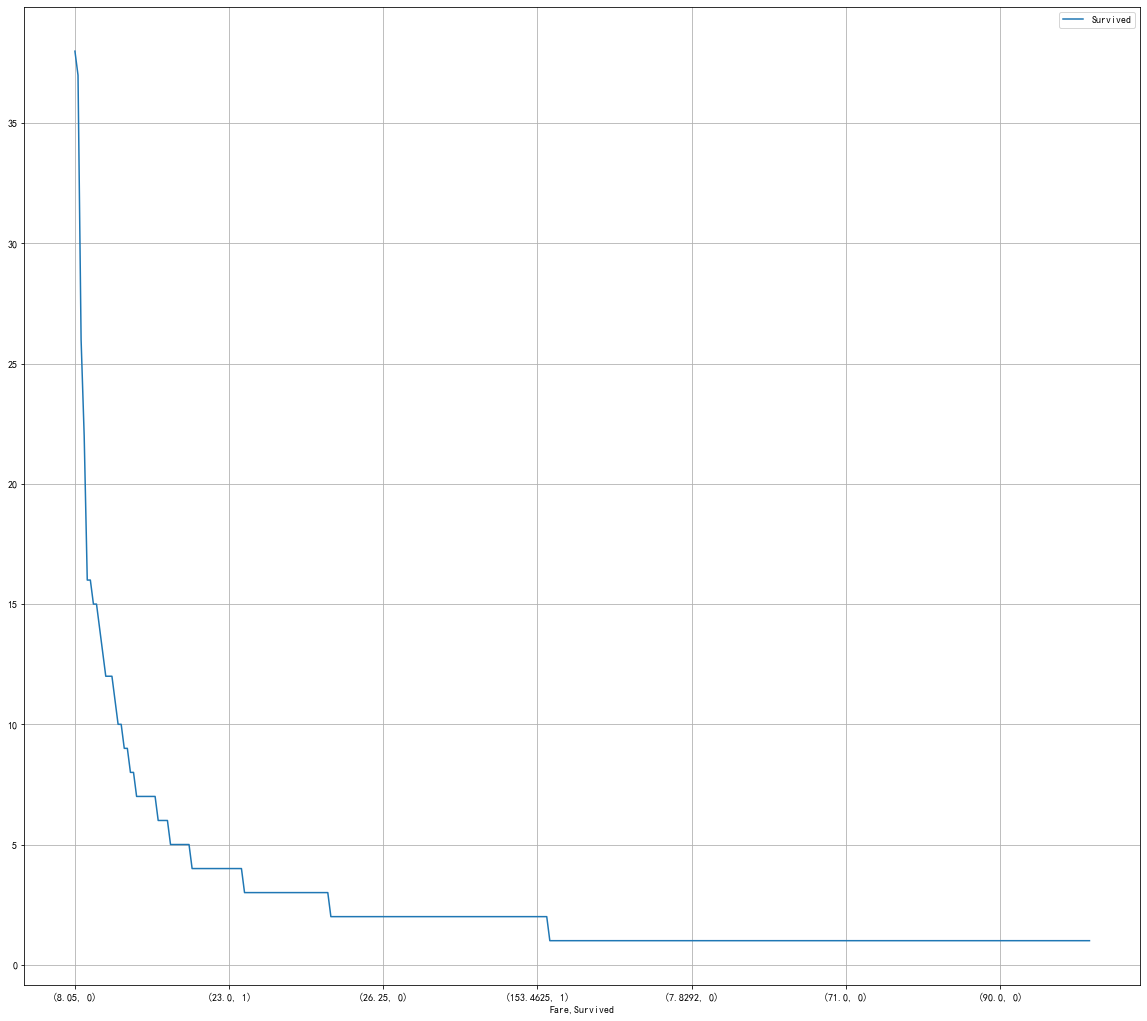

In [9]:
#代码编写
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
# 排序后绘制折线图
FareSurvived=Result.groupby(['Fare']).Survived.value_counts().sort_values(ascending=False)
FareSurvived.head()
fig=plt.figure(figsize=(20,18))
FareSurvived.plot(grid=True)
plt.legend()
plt.show()

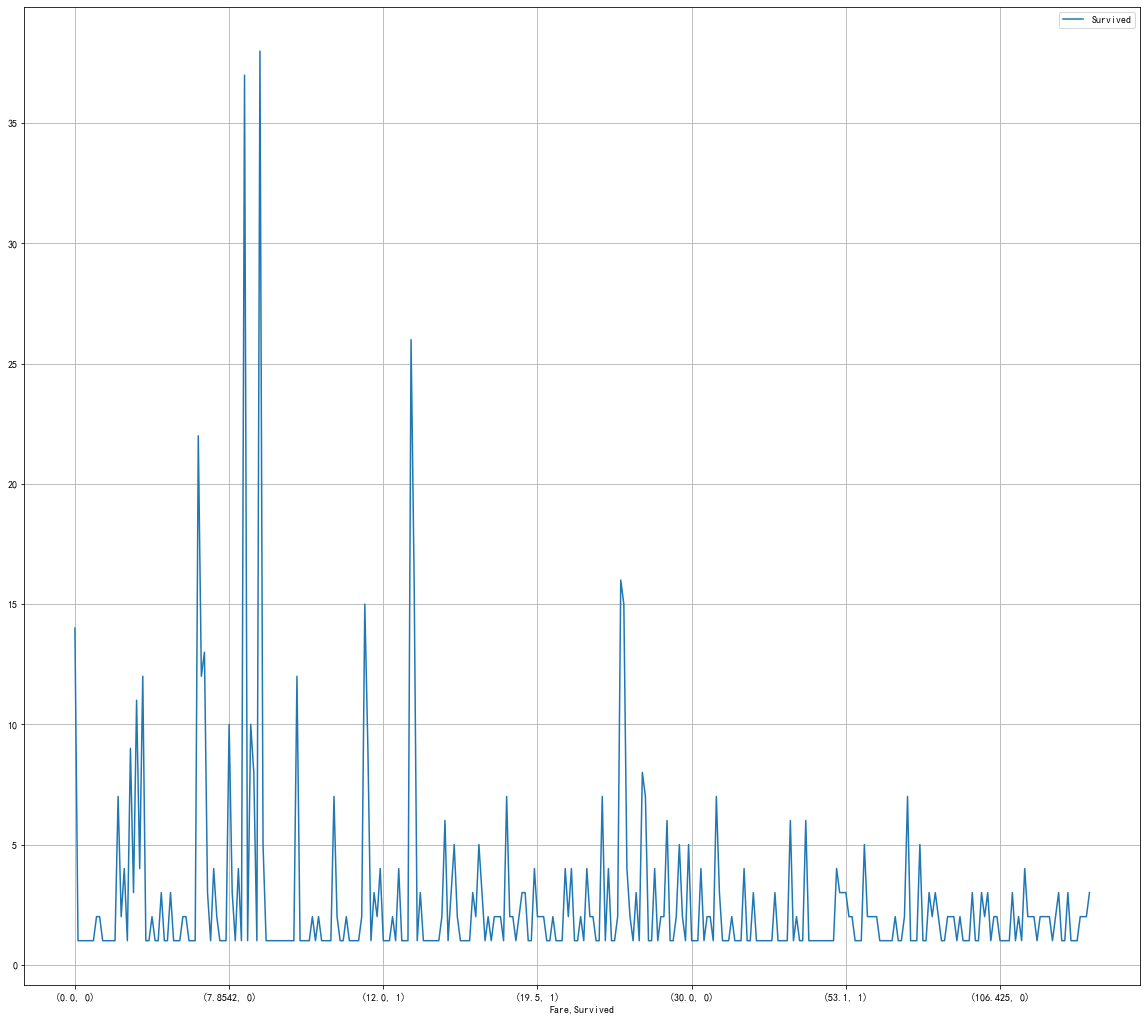

In [10]:
# 排序前绘制折线图
FareSurvived=Result.groupby(['Fare']).Survived.value_counts()
FareSurvived.head()
fig=plt.figure(figsize=(20,18))
FareSurvived.plot(grid=True)
plt.legend()
plt.show()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [31]:
#代码编写
# 1表示生存，0表示死亡
Pclass=Result.groupby(['Pclass'])['Survived'].value_counts()
Pclass.head()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
Name: Survived, dtype: int64

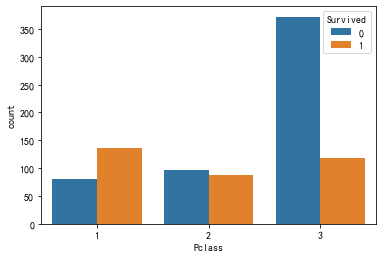

In [32]:
import seaborn as sns
sns.countplot(x='Pclass', hue='Survived', data=Result)

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

In [34]:
#思考题回答
# 绘图的目的在于清晰明确的表达数据，首先要明确的是自变量与因变量，同时也要考虑自己输入值的数据类型，多尝试才能有思路。

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

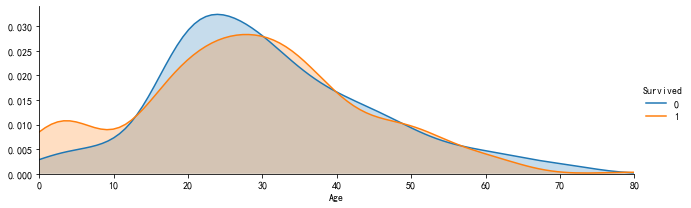

In [39]:
#代码编写
AgeSurvived=sns.FacetGrid(Result,hue='Survived',aspect=3)
AgeSurvived.map(sns.kdeplot,'Age',shade='True')
AgeSurvived.set(xlim=(0,Result['Age'].max()))
AgeSurvived.add_legend()

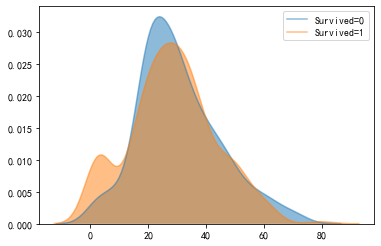

In [43]:
#个人：
sns.kdeplot(Result.loc[Result['Survived'] == 0, "Age"], shade=True,  label="Survived=0", alpha=.5)
sns.kdeplot(Result.loc[Result['Survived'] == 1, "Age"], shade=True,  label="Survived=1", alpha=.5)

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

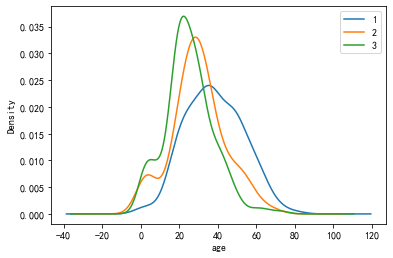

In [40]:
#代码编写
Result.Age[Result.Pclass==1].plot(kind='kde')
Result.Age[Result.Pclass==2].plot(kind='kde')
Result.Age[Result.Pclass==3].plot(kind='kde')
plt.xlabel('age')
plt.legend((1,2,3),loc='best')

【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

In [44]:
#思考题回答
# 女性存活率更高
# 仓位等级高的人存活率更高
# 中青年存活率更高

【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？